## 5.1 Introduction
Statisticians can be a sour bunch. Instead of considering their winnings, they only measure how much they have lost. In fact, they consider their wins as negative losses. But what's interesting is how they measure their losses.

## 5.2 Loss Functions
We introduce what statisticians and decision theorists call loss functions. A loss function is a function of the true parameter, and an estimate of that parameter

$$ L( \theta, \hat{\theta} ) = f( \theta, \hat{\theta} )$$
The important point of loss functions is that it measures how bad our current estimate is: the larger the loss, the worse the estimate is according to the loss function. A simple, and very common, example of a loss function is the squared-error loss:

$$ L( \theta, \hat{\theta} ) = ( \theta -  \hat{\theta} )^2$$
The squared-error loss function is used in estimators like linear regression, UMVUEs and many areas of machine learning. We can also consider an asymmetric squared-error loss function, something like:

$$ L( \theta, \hat{\theta} ) = \begin{cases} ( \theta -  \hat{\theta} )^2 &amp; \hat{\theta} \lt \theta \\\\ c( \theta -  \hat{\theta} )^2 &amp; \hat{\theta} \ge \theta, \;\; 0\lt c \lt 1 \end{cases}$$
which represents that estimating a value larger than the true estimate is preferable to estimating a value below. A situation where this might be useful is in estimating web traffic for the next month, where an over-estimated outlook is preferred so as to avoid an underallocation of server resources.

A negative property about the squared-error loss is that it puts a disproportionate emphasis on large outliers. This is because the loss increases quadratically, and not linearly, as the estimate moves away. That is, the penalty of being three units away is much less than being five units away, but the penalty is not much greater than being one unit away, though in both cases the magnitude of difference is the same:

$$ \frac{1^2}{3^2} \lt \frac{3^2}{5^2}, \;\; \text{although} \;\; 3-1 = 5-3 $$
This loss function imposes that large errors are very bad. A more robust loss function that increases linearly with the difference is the absolute-loss

$$ L( \theta, \hat{\theta} ) = | \theta -  \hat{\theta} | $$
Other popular loss functions include:

$L( \theta, \hat{\theta} ) = \mathbb{1}_{ \hat{\theta} \neq \theta }$ is the zero-one loss often used in machine learning classification algorithms.
$L( \theta, \hat{\theta} ) = -\theta\log( \hat{\theta} ) - (1- \theta)\log( 1 - \hat{\theta} ), \; \; \theta \in {0,1}, \; \hat{\theta} \in [0,1]$, called the log-loss, also used in machine learning.
Historically, loss functions have been motivated from 1) mathematical convenience, and 2) they are robust to application, i.e., they are objective measures of loss. The first reason has really held back the full breadth of loss functions. With computers being agnostic to mathematical convenience, we are free to design our own loss functions, which we take full advantage of later in this Chapter.

With respect to the second point, the above loss functions are indeed objective, in that they are most often a function of the difference between estimate and true parameter, independent of signage or payoff of choosing that estimate. This last point, its independence of payoff, causes quite pathological results though. Consider our hurricane example above: the statistician equivalently predicted that the probability of the hurricane striking was between 0% to 1%. But if he had ignored being precise and instead focused on outcomes (99% chance of no flood, 1% chance of flood), he might have advised differently.

By shifting our focus from trying to be incredibly precise about parameter estimation to focusing on the outcomes of our parameter estimation, we can customize our estimates to be optimized for our application. This requires us to design new loss functions that reflect our goals and outcomes. Some examples of more interesting loss functions:

$L( \theta, \hat{\theta} ) = \frac{ | \theta - \hat{\theta} | }{ \theta(1-\theta) }, \; \; \hat{\theta}, \theta \in [0,1]$ emphasizes an estimate closer to 0 or 1 since if the true value $\theta$ is near 0 or 1, the loss will be very large unless $\hat{\theta}$ is similarly close to 0 or 1. This loss function might be used by a political pundit whose job requires him or her to give confident "Yes/No" answers. This loss reflects that if the true parameter is close to 1 (for example, if a political outcome is very likely to occur), he or she would want to strongly agree as to not look like a skeptic.

$L( \theta, \hat{\theta} ) =  1 - \exp \left( -(\theta -  \hat{\theta} )^2 \right)$ is bounded between 0 and 1 and reflects that the user is indifferent to sufficiently-far-away estimates. It is similar to the zero-one loss above, but not quite as penalizing to estimates that are close to the true parameter.
        
As you can see, loss functions can be used for good and evil: with great power, comes great — well you know.

### 5.2.1 Loss functions in the real world
So far we have been under the unrealistic assumption that we know the true parameter. Of course if we knew the true parameter, bothering to guess an estimate is pointless. Hence a loss function is really only practical when the true parameter is unknown.

In Bayesian inference, we have a mindset that the unknown parameters are really random variables with prior and posterior distributions. Concerning the posterior distribution, a value drawn from it is a possible realization of what the true parameter could be. Given that realization, we can compute a loss associated with an estimate. As we have a whole distribution of what the unknown parameter could be (the posterior), we should be more interested in computing the expected loss given an estimate. This expected loss is a better estimate of the true loss than comparing the given loss from only a single sample from the posterior.

First it will be useful to explain a Bayesian point estimate. The systems and machinery present in the modern world are not built to accept posterior distributions as input. It is also rude to hand someone over a distribution when all they asked for was an estimate. In the course of an individual's day, when faced with uncertainty we still act by distilling our uncertainty down to a single action. Similarly, we need to distill our posterior distribution down to a single value (or vector in the multivariate case). If the value is chosen intelligently, we can avoid the flaw of frequentist methodologies that mask the uncertainty and provide a more informative result.The value chosen, if from a Bayesian posterior, is a Bayesian point estimate.

Suppose $P(\theta | X)$ is the posterior distribution of $\theta$ after observing data $X$, then the following function is understandable as the expected loss of choosing estimate $\hat{\theta}$ to estimate $\theta$:

$$ l(\hat{\theta} ) = E_{\theta}\left[ \; L(\theta, \hat{\theta}) \; \right] $$
This is also known as the risk of estimate $\hat{\theta}$. The subscript $\theta$ under the expectation symbol is used to denote that $\theta$ is the unknown (random) variable in the expectation, something that at first can be difficult to consider.

We spent all of last chapter discussing how to approximate expected values. Given $N$ samples $\theta_i,\; i=1,...,N$ from the posterior distribution, and a loss function $L$, we can approximate the expected loss of using estimate $\hat{\theta}$ by the Law of Large Numbers:

$$\frac{1}{N} \sum_{i=1}^N \;L(\theta_i, \hat{\theta} ) \approx E_{\theta}\left[ \; L(\theta, \hat{\theta}) \; \right]  = l(\hat{\theta} ) $$
Notice that measuring your loss via an expected value uses more information from the distribution than the MAP estimate which, if you recall, will only find the maximum value of the distribution and ignore the shape of the distribution. Ignoring information can over-expose yourself to tail risks, like the unlikely hurricane, and leaves your estimate ignorant of how ignorant you really are about the parameter.

Similarly, compare this with frequentist methods, that traditionally only aim to minimize the error, and do not consider the loss associated with the result of that error. Compound this with the fact that frequentist methods are almost guaranteed to never be absolutely accurate. Bayesian point estimates fix this by planning ahead: your estimate is going to be wrong, you might as well err on the right side of wrong.

### 5.2.2 Example: Optimizing for the Showcase on The Price is Right
Bless you if you are ever chosen as a contestant on the Price is Right, for here we will show you how to optimize your final price on the Showcase. For those who forget the rules:
1. Two contestants compete in The Showcase.
2. Each contestant is shown a unique suite of prizes.
3. After the viewing, the contestants are asked to bid on the price for their unique suite of prizes.
4. If a bid price is over the actual price, the bid's owner is disqualified from winning.
5. If a bid price is under the true price by less than $250, the winner is awarded both prizes.

The difficulty in the game is balancing your uncertainty in the prices, keeping your bid low enough so as to not bid over, and trying to bid close to the price.

Suppose we have recorded the Showcases from previous The Price is Right episodes and have prior beliefs about what distribution the true price follows. For simplicity, suppose it follows a Normal:

$$\text{True Price} \sim \text{Normal}(\mu_p, \sigma_p )$$
In a later chapter, we will actually use real Price is Right Showcase data to form the historical prior, but this requires some advanced PyMC3 use so we will not use it here. For now, we will assume $\mu_p = 35 000$ and $\sigma_p = 7500$.

We need a model of how we should be playing the Showcase. For each prize in the prize suite, we have an idea of what it might cost, but this guess could differ significantly from the true price. (Couple this with increased pressure being onstage and you can see why some bids are so wildly off). Let's suppose your beliefs about the prices of prizes also follow Normal distributions:

$$ \text{Prize}_i \sim \text{Normal}(\mu_i, \sigma_i ),\;\; i=1,2$$
This is really why Bayesian analysis is great: we can specify what we think a fair price is through the $\mu_i$ parameter, and express uncertainty of our guess in the $\sigma_i$ parameter.

We'll assume two prizes per suite for brevity, but this can be extended to any number. The true price of the prize suite is then given by $\text{Prize}_1 + \text{Prize}_2 + \epsilon$, where $\epsilon$ is some error term.

We are interested in the updated $\text{True Price}$ given we have observed both prizes and have belief distributions about them. We can perform this using PyMC3.

Lets make some values concrete. Suppose there are two prizes in the observed prize suite:

A trip to wonderful Toronto, Canada!
A lovely new snowblower!
We have some guesses about the true prices of these objects, but we are also pretty uncertain about them. I can express this uncertainty through the parameters of the Normals:

$$\begin{align}
\text{snowblower} \sim \text{Normal}(3 000, 500 )\\\\
\text{Toronto} \sim \text{Normal}(12 000, 3000 )\\\\
\end{align}$$

For example, I believe that the true price of the trip to Toronto is 12 000 dollars, and that there is a 68.2\% chance the price falls 1 standard deviation away from this, i.e. my confidence is that there is a 68.2\% chance the trip is in $[9000, 15000]$.

We can create some PyMC3 code to perform inference on the true price of the suite.

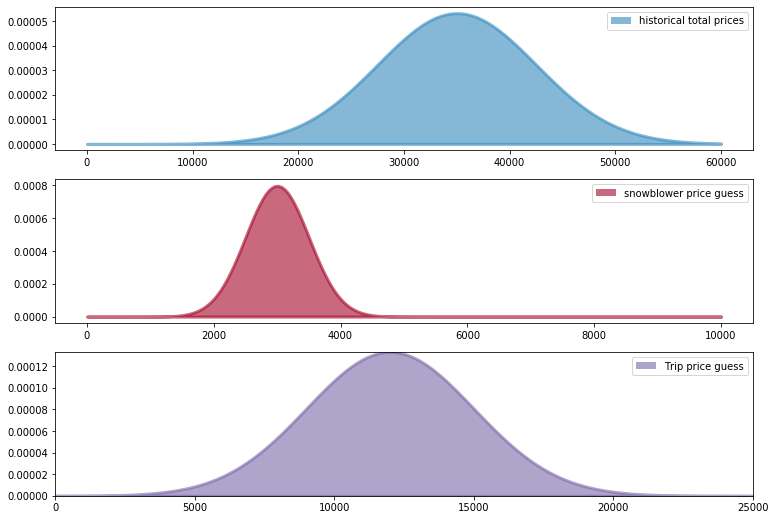

In [1]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt

figsize(12.5, 9)

norm_pdf = stats.norm.pdf

plt.subplot(311)
x = np.linspace(0, 60000, 200)
sp1 = plt.fill_between(x , 0, norm_pdf(x, 35000, 7500), 
                color = "#348ABD", lw = 3, alpha = 0.6,
                label = "historical total prices")
p1 = plt.Rectangle((0, 0), 1, 1, fc=sp1.get_facecolor()[0])
plt.legend([p1], [sp1.get_label()])

plt.subplot(312)
x = np.linspace(0, 10000, 200)
sp2 = plt.fill_between(x , 0, norm_pdf(x, 3000, 500), 
                 color = "#A60628", lw = 3, alpha = 0.6,
                 label="snowblower price guess")

p2 = plt.Rectangle((0, 0), 1, 1, fc=sp2.get_facecolor()[0])
plt.legend([p2], [sp2.get_label()])

plt.subplot(313)
x = np.linspace(0, 25000, 200)
sp3 = plt.fill_between(x , 0, norm_pdf(x, 12000, 3000), 
                 color = "#7A68A6", lw = 3, alpha = 0.6,
                 label = "Trip price guess")
plt.autoscale(tight=True)
p3 = plt.Rectangle((0, 0), 1, 1, fc=sp3.get_facecolor()[0])
plt.legend([p3], [sp3.get_label()]);

In [2]:
import pymc3 as pm

data_mu = [3e3, 12e3]

data_std =  [5e2, 3e3] 

mu_prior = 35e3
std_prior =  75e2
with pm.Model() as model:
    true_price = pm.Normal("true_price", mu=mu_prior, sd=std_prior)
    
    prize_1 = pm.Normal("first_prize", mu=data_mu[0], sd=data_std[0])
    prize_2 = pm.Normal("second_prize", mu=data_mu[1], sd=data_std[1])
    price_estimate = prize_1 + prize_2
    
    logp = pm.Normal.dist(mu=price_estimate, sd=(3e3)).logp(true_price)
    error = pm.Potential("error", logp)
    

    trace = pm.sample(50000, step=pm.Metropolis())
    burned_trace = trace[10000:]

price_trace = burned_trace["true_price"]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [second_prize]
>Metropolis: [first_prize]
>Metropolis: [true_price]
Sampling 2 chains: 100%|██████████| 101000/101000 [00:42<00:00, 2351.96draws/s]
The number of effective samples is smaller than 10% for some parameters.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


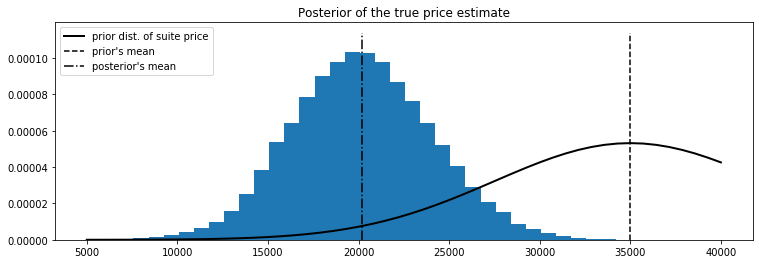

In [3]:
figsize(12.5, 4)

import scipy.stats as stats

x = np.linspace(5000, 40000)
plt.plot(x, stats.norm.pdf(x, 35000, 7500), c = "k", lw = 2, 
         label = "prior dist. of suite price")

_hist = plt.hist(price_trace, bins = 35, normed= True, histtype= "stepfilled")
plt.title("Posterior of the true price estimate")
plt.vlines(mu_prior, 0, 1.1*np.max(_hist[0]), label = "prior's mean",
           linestyles="--")
plt.vlines(price_trace.mean(), 0, 1.1*np.max(_hist[0]), \
           label = "posterior's mean", linestyles="-.")
plt.legend(loc = "upper left");

Notice that because of our two observed prizes and subsequent guesses (including uncertainty about those guesses), we shifted our mean price estimate down about \$15,000 dollars from the previous mean price.

A frequentist, seeing the two prizes and having the same beliefs about their prices, would bid $\mu_1 + \mu_2 = 35000$, regardless of any uncertainty. Meanwhile, the naive Bayesian would simply pick the mean of the posterior distribution. But we have more information about our eventual outcomes; we should incorporate this into our bid. We will use the loss function above to find the best bid (best according to our loss).

What might a contestant's loss function look like? I would think it would look something like:

In [ ]:
def showcase_loss(guess, true_price, risk = 80000):
    if true_price < guess:
        return risk
    elif abs(true_price - guess) <= 250:
        return -2*np.abs(true_price)
    else:
        return np.abs(true_price - guess - 250)

where risk is a parameter that defines of how bad it is if your guess is over the true price. A lower risk means that you are more comfortable with the idea of going over. If we do bid under and the difference is less than $250, we receive both prizes (modeled here as receiving twice the original prize). Otherwise, when we bid under the true_price we want to be as close as possible, hence the else loss is a increasing function of the distance between the guess and true price.

For every possible bid, we calculate the expected loss associated with that bid. We vary the risk parameter to see how it affects our loss:

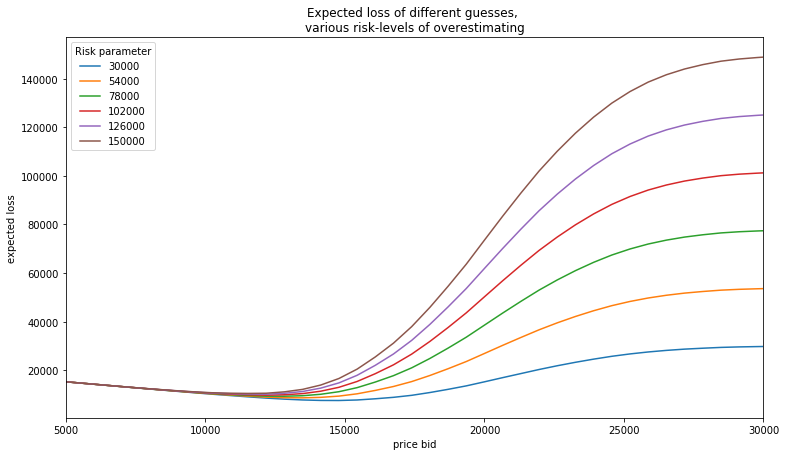

In [4]:
figsize(12.5, 7)

def showdown_loss(guess, true_price, risk = 80000):
        loss = np.zeros_like(true_price)
        ix = true_price < guess
        loss[~ix] = np.abs(guess - true_price[~ix])
        close_mask = [abs(true_price - guess) <= 250]
        loss[close_mask] = -2*true_price[close_mask]
        loss[ix] = risk
        return loss


guesses = np.linspace(5000, 50000, 70) 
risks = np.linspace(30000, 150000, 6)
expected_loss = lambda guess, risk: \
    showdown_loss(guess, price_trace, risk).mean()
        
for _p in risks:
    results = [expected_loss(_g, _p) for _g in guesses]
    plt.plot(guesses, results, label = "%d"%_p)
    
plt.title("Expected loss of different guesses, \nvarious risk-levels of \
overestimating")
plt.legend(loc="upper left", title="Risk parameter")
plt.xlabel("price bid")
plt.ylabel("expected loss")
plt.xlim(5000, 30000);

#### Minimizing our losses
It would be wise to choose the estimate that minimizes our expected loss. This corresponds to the minimum point on each of the curves above. More formally, we would like to minimize our expected loss by finding the solution to

$$ \text{arg} \min_{\hat{\theta}} \;\;E_{\theta}\left[ \; L(\theta, \hat{\theta}) \; \right] $$
The minimum of the expected loss is called the Bayes action. We can solve for the Bayes action using Scipy's optimization routines. The function in fmin in scipy.optimize module uses an intelligent search to find a minimum (not necessarily a global minimum) of any uni- or multivariate function. For most purposes, fmin will provide you with a good answer.

We'll compute the minimum loss for the Showcase example above:

minimum at risk 30000: 14625.34
minimum at risk 54000: 13459.27
minimum at risk 78000: 12679.03
minimum at risk 102000: 12341.27
minimum at risk 126000: 12057.45
minimum at risk 150000: 11455.85


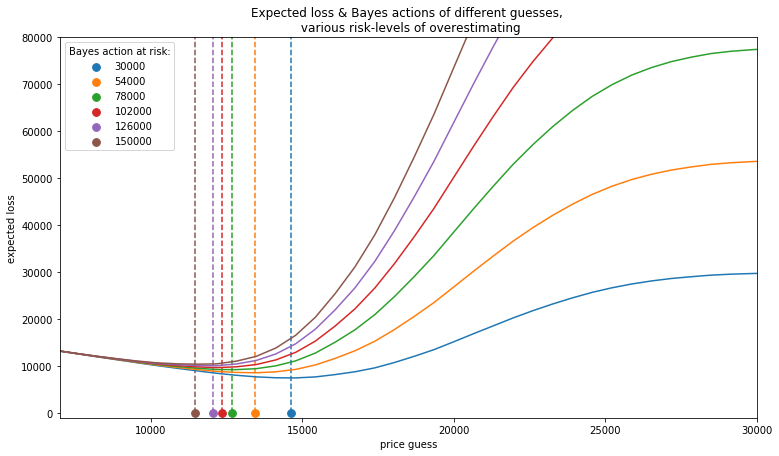

In [5]:
import scipy.optimize as sop

ax = plt.subplot(111)


for _p in risks:
    _color = next(ax._get_lines.prop_cycler)
    _min_results = sop.fmin(expected_loss, 15000, args=(_p,),disp = False)
    _results = [expected_loss(_g, _p) for _g in guesses]
    plt.plot(guesses, _results , color = _color['color'])
    plt.scatter(_min_results, 0, s = 60, \
                color= _color['color'], label = "%d"%_p)
    plt.vlines(_min_results, 0, 120000, color = _color['color'], linestyles="--")
    print("minimum at risk %d: %.2f" % (_p, _min_results))
                                    
plt.title("Expected loss & Bayes actions of different guesses, \n \
various risk-levels of overestimating")
plt.legend(loc="upper left", scatterpoints = 1, title = "Bayes action at risk:")
plt.xlabel("price guess")
plt.ylabel("expected loss")
plt.xlim(7000, 30000)
plt.ylim(-1000, 80000);

As intuition suggests, as we decrease the risk threshold (care about overbidding less), we increase our bid, willing to edge closer to the true price. It is interesting how far away our optimized loss is from the posterior mean, which was about 20 000.

Suffice to say, in higher dimensions being able to eyeball the minimum expected loss is impossible. Hence why we require use of Scipy's fmin function.

#### Shortcuts
For some loss functions, the Bayes action is known in closed form. We list some of them below:

* If using the mean-squared loss, the Bayes action is the mean of the posterior distribution, i.e. the value $$ E_{\theta}\left[ \theta \right] $$ minimizes $E_{\theta}\left[ \; (\theta - \hat{\theta})^2 \; \right]$. Computationally this requires us to calculate the average of the posterior samples [See chapter 4 on The Law of Large Numbers]

* Whereas the median of the posterior distribution minimizes the expected absolute-loss. The sample median of the posterior samples is an appropriate and very accurate approximation to the true median.

* In fact, it is possible to show that the MAP estimate is the solution to using a loss function that shrinks to the zero-one loss.

Maybe it is clear now why the first-introduced loss functions are used most often in the mathematics of Bayesian inference: no complicated optimizations are necessary. Luckily, we have machines to do the complications for us.

## 5.3 Machine Learning via Bayesian Methods
Whereas frequentist methods strive to achieve the best precision about all possible parameters, machine learning cares to achieve the best prediction among all possible parameters. Of course, one way to achieve accurate predictions is to aim for accurate predictions, but often your prediction measure and what frequentist methods are optimizing for are very different.

For example, least-squares linear regression is the most simple active machine learning algorithm. I say active as it engages in some learning, whereas predicting the sample mean is technically simpler, but is learning very little if anything. The loss that determines the coefficients of the regressors is a squared-error loss. On the other hand, if your prediction loss function (or score function, which is the negative loss) is not a squared-error, like AUC, ROC, precision, etc., your least-squares line will not be optimal for the prediction loss function. This can lead to prediction results that are suboptimal.

Finding Bayes actions is equivalent to finding parameters that optimize not parameter accuracy but an arbitrary performance measure, however we wish to define performance (loss functions, AUC, ROC, precision/recall etc.).

The next two examples demonstrate these ideas. The first example is a linear model where we can choose to predict using the least-squares loss or a novel, outcome-sensitive loss.

The second example is adapted from a Kaggle data science project. The loss function associated with our predictions is incredibly complicated.

### 5.3.1 Example: Financial prediction
Suppose the future return of a stock price is very small, say 0.01 (or 1%). We have a model that predicts the stock's future price, and our profit and loss is directly tied to us acting on the prediction. How should we measure the loss associated with the model's predictions, and subsequent future predictions? A squared-error loss is agnostic to the signage and would penalize a prediction of -0.01 equally as bad a prediction of 0.03:

$$ (0.01 - (-0.01))^2 = (0.01 - 0.03)^2 = 0.004$$
If you had made a bet based on your model's prediction, you would have earned money with a prediction of 0.03, and lost money with a prediction of -0.01, yet our loss did not capture this. We need a better loss that takes into account the sign of the prediction and true value. We design a new loss that is better for financial applications below:

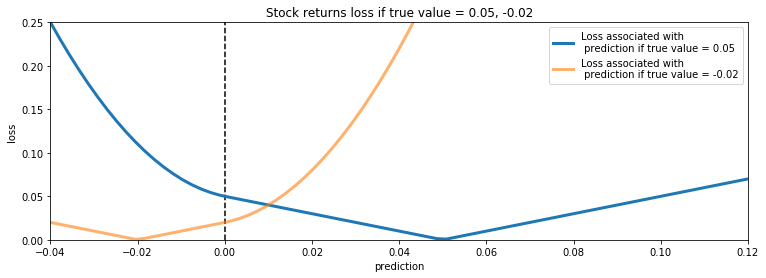

In [6]:
figsize(12.5, 4)


def stock_loss(true_return, yhat, alpha = 100.):
    if true_return * yhat < 0:
        #opposite signs, not good
        return alpha*yhat**2 - np.sign(true_return)*yhat \
                        + abs(true_return) 
    else:
        return abs(true_return - yhat)
    
    
true_value = .05
pred = np.linspace(-.04, .12, 75)

plt.plot(pred, [stock_loss(true_value, _p) for _p in pred], \
        label = "Loss associated with\n prediction if true value = 0.05", lw =3) 
plt.vlines(0, 0, .25, linestyles="--")

plt.xlabel("prediction")
plt.ylabel("loss")
plt.xlim(-0.04, .12)
plt.ylim(0, 0.25)

true_value = -.02
plt.plot(pred, [stock_loss(true_value, _p) for _p in pred], alpha = 0.6, \
        label = "Loss associated with\n prediction if true value = -0.02", lw =3) 
plt.legend()
plt.title("Stock returns loss if true value = 0.05, -0.02");

Note the change in the shape of the loss as the prediction crosses zero. This loss reflects that the user really does not want to guess the wrong sign, especially be wrong and a large magnitude.

Why would the user care about the magnitude? Why is the loss not 0 for predicting the correct sign? Surely, if the return is 0.01 and we bet millions we will still be (very) happy.

Financial institutions treat downside risk, as in predicting a lot on the wrong side, and upside risk, as in predicting a lot on the right side, similarly. Both are seen as risky behaviour and discouraged. Hence why we have an increasing loss as we move further away from the true price. (With less extreme loss in the direction of the correct sign.)

We will perform a regression on a trading signal that we believe predicts future returns well. Our dataset is artificial, as most financial data is not even close to linear. Below, we plot the data along with the least-squares line.

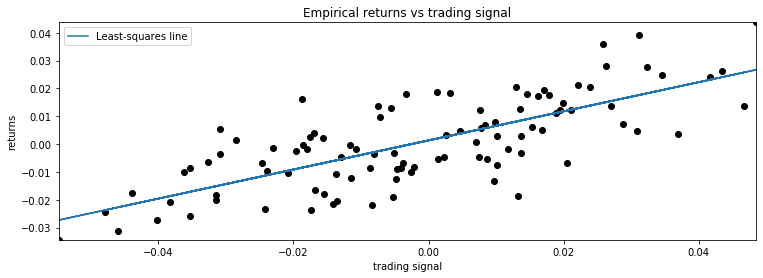

In [7]:
# Code to create artificial data
N = 100
X = 0.025*np.random.randn(N)
Y = 0.5*X + 0.01*np.random.randn(N) 

ls_coef_ = np.cov(X, Y)[0,1]/np.var(X)
ls_intercept = Y.mean() - ls_coef_*X.mean()

plt.scatter(X, Y, c="k")
plt.xlabel("trading signal")
plt.ylabel("returns")
plt.title("Empirical returns vs trading signal")
plt.plot(X, ls_coef_*X + ls_intercept, label = "Least-squares line")
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())
plt.legend(loc="upper left");

We perform a simple Bayesian linear regression on this dataset. We look for a model like:

$$ R = \alpha + \beta x + \epsilon$$
where $\alpha, \beta$ are our unknown parameters and $\epsilon \sim \text{Normal}(0, \sigma)$. The most common priors on $\beta$ and $\alpha$ are Normal priors. We will also assign a prior on $\sigma$, so that $\sigma$ is uniform over 0 to 100.

In [8]:
with pm.Model() as model:
    std = pm.Uniform("std", 0, 100)
    
    beta = pm.Normal("beta", mu=0, sd=100)
    alpha = pm.Normal("alpha", mu=0, sd=100)
    
    mean = pm.Deterministic("mean", alpha + beta*X)
    
    obs = pm.Normal("obs", mu=mean, sd=std, observed=Y)
    
    trace = pm.sample(100000, step=pm.Metropolis())
    burned_trace = trace[20000:]

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [alpha]
>Metropolis: [beta]
>Metropolis: [std]
Sampling 2 chains: 100%|██████████| 201000/201000 [01:34<00:00, 2128.95draws/s]
The number of effective samples is smaller than 10% for some parameters.


It appears the MCMC has converged so we may continue.

For a specific trading signal, call it $x$, the distribution of possible returns has the form:

$$R_i(x) =  \alpha_i + \beta_ix + \epsilon $$
where $\epsilon \sim \text{Normal}(0, \sigma_i)$ and $i$ indexes our posterior samples. We wish to find the solution to

$$ \arg \min_{r} \;\;E_{R(x)}\left[ \; L(R(x), r) \; \right] $$
according to the loss given above. This $r$ is our Bayes action for trading signal $x$. Below we plot the Bayes action over different trading signals. What do you notice?

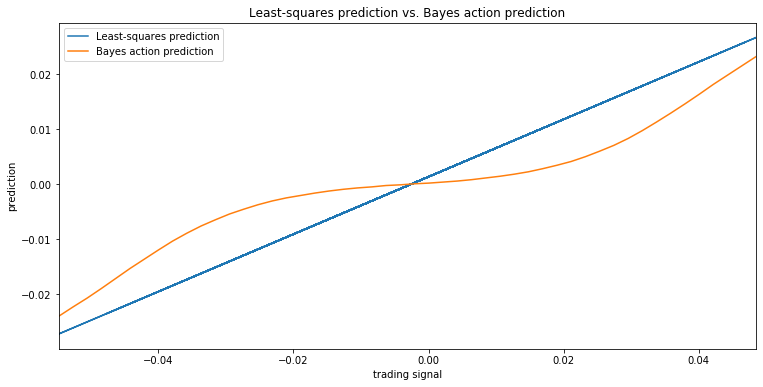

In [11]:
figsize(12.5, 6)
from scipy.optimize import fmin


def stock_loss(price, pred, coef = 500):
    """vectorized for numpy"""
    sol = np.zeros_like(price)
    ix = price*pred < 0 
    sol[ix] = coef*pred**2 - np.sign(price[ix])*pred + abs(price[ix])
    sol[~ix] = abs(price[~ix] - pred)
    return sol

std_samples = burned_trace["std"]
alpha_samples = burned_trace["alpha"]
beta_samples = burned_trace["beta"]

N = std_samples.shape[0]

noise = std_samples*np.random.randn(N) 

possible_outcomes = lambda signal: alpha_samples + beta_samples*signal + noise


opt_predictions = np.zeros(50)
trading_signals =  np.linspace(X.min(), X.max(), 50)
for i, _signal in enumerate(trading_signals):
        _possible_outcomes = possible_outcomes(_signal)
        tomin = lambda pred: stock_loss(_possible_outcomes, pred).mean()
        opt_predictions[i] = fmin(tomin, 0, disp = False)
        
        
plt.xlabel("trading signal")
plt.ylabel("prediction")
plt.title("Least-squares prediction vs. Bayes action prediction")
plt.plot(X, ls_coef_*X + ls_intercept, label ="Least-squares prediction")
plt.xlim(X.min(), X.max())
plt.plot(trading_signals, opt_predictions, label ="Bayes action prediction")
plt.legend(loc="upper left");

What is interesting about the above graph is that when the signal is near 0, and many of the possible returns outcomes are possibly both positive and negative, our best (with respect to our loss) prediction is to predict close to 0, hence take on no position. Only when we are very confident do we enter into a position. I call this style of model a sparse prediction, where we feel uncomfortable with our uncertainty so choose not to act. (Compare with the least-squares prediction which will rarely, if ever, predict zero).

A good sanity check that our model is still reasonable: as the signal becomes more and more extreme, and we feel more and more confident about the positive/negativeness of returns, our position converges with that of the least-squares line.

The sparse-prediction model is not trying to fit the data the best (according to a squared-error loss definition of fit). That honor would go to the least-squares model. The sparse-prediction model is trying to find the best prediction with respect to our stock_loss-defined loss. We can turn this reasoning around: the least-squares model is not trying to predict the best (according to a stock-loss definition of predict). That honor would go the sparse prediction model. The least-squares model is trying to find the best fit of the data with respect to the squared-error loss.

## 5.4 Conclusions
Loss functions are one of the most interesting parts of statistics. They directly connect inference and the domain the problem is in. One thing not mentioned is that the loss function is another degree of freedom in your overall model. This is a good thing, as we saw in this chapter; loss functions can be used very effectively, but can be a bad thing, too. An extreme case is that a practitioner can change his or her loss function if the results do not fit the desired result. For this reason, it's best to set the loss funtion ASAP in the analysis, and have its derivation open and logical.